# Sentiment Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


### load needed libraries

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Avishek
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata
import os
from IPython.display import Image

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
#from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
#import transformers
#import tokenizers

### load our data

In [4]:
data = pd.read_csv('Corona_NLP_train.csv', encoding = 'latin-1')

### Data preprocessing

In [5]:
data['sentiment']=data['Sentiment']

In [6]:
data['review']=data['OriginalTweet']

In [7]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,sentiment,review
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
 6   sentiment      41157 non-null  object
 7   review         41157 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.5+ MB


In [9]:
data.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [10]:
data['sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: sentiment, dtype: int64

In [11]:
df=data.copy()

### Data Cleaning

In [12]:
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
sentiment           0
review              0
dtype: int64

In [13]:
 data.duplicated().sum()

0

In [14]:
data.drop_duplicates(inplace = True)

In [15]:
data.shape

(41157, 8)

In [16]:
stop = stopwords.words('english')
wl = WordNetLemmatizer()

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Avishek
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [19]:
#function to clean data


def clean_text(text,lemmatize = True):
    soup = BeautifulSoup(text, "html.parser") #remove html tags
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    #tokens = re.split('\W+', text) #create tokens
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stop and word.isalpha()]) 
    return text

In [20]:
data['review']=data['review'].apply(clean_text,lemmatize = True)

c:\users\avishek kumar\appdata\local\programs\python\python39\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\users\avishek kumar\appdata\local\programs\python\python39\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [21]:
# Function to convert score to sentiment
def to_sentiment(rating):
    
    if(rating=='Neutral'):
        return 2
    elif rating=='Positive':
        return 3
    elif rating=='Extremely Positive':
        return 4
    elif rating=='Negative':
        return 1
    elif rating=='Extremely Negative':
        return 0


In [22]:

# Apply to the dataset 
data['sentiment'] = data.Sentiment.apply(to_sentiment)
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,sentiment,review
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0,ready go supermarket outbreak paranoid food st...


#### Spliting the training dataset


In [23]:
#splitting into train and test
train, test= train_test_split(data, test_size=0.2, random_state=42)

#train dataset
Xtrain, ytrain = train['review'], train['sentiment']

#test dataset
Xtest, ytest = test['review'], test['sentiment']

print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(32925,) (32925,)
(8232,) (8232,)


#### Vectorizing data




In [24]:
vect = TfidfVectorizer()
Xtrain_vect= vect.fit_transform(Xtrain)
Xtest_vect = vect.transform(Xtest)


count_vect = CountVectorizer() 
Xtrain_count = count_vect.fit_transform(Xtrain)
Xtest_count = count_vect.transform(Xtest)

# 1- LSTM model

In [25]:
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(Xtrain)
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  47031


In [26]:
##create sequences of reviews
seq_train = tokenizer.texts_to_sequences(Xtrain)
seq_test =  tokenizer.texts_to_sequences(Xtest)

In [27]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 39


In [28]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 29


In [29]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

The above calculated number coveres approximately 98.17 % of data


In [30]:
#create padded sequences
pad_train=pad_sequences(seq_train,truncating = 'post', padding = 'pre',maxlen=max_seq_len)
pad_test=pad_sequences(seq_test,truncating = 'post', padding = 'pre',maxlen=max_seq_len)

In [31]:
#Splitting training set for validation purposes
Xtrain,Xval,ytrain,yval=train_test_split(pad_train,ytrain,
                                             test_size=0.2,random_state=10)

In [50]:
from tensorflow.keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def lstm_model(Xtrain, Xval, ytrain, yval, V, D, maxlen, epochs, num_classes):

    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D, input_length=maxlen)(i)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(32, 5, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)  # Output probabilities for each class
    model = Model(i, x)
    model.summary()

    # Training the LSTM
    print("----Training the network----")
    model.compile(optimizer=Adam(0.0005),
                  loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for multi-class classification
                  metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

    r = model.fit(Xtrain, ytrain,
                  validation_data=(Xval, yval),
                  epochs=epochs,
                  verbose=2,
                  batch_size=32,
                  callbacks=[early_stop])

    print("Train score:", model.evaluate(Xtrain, ytrain))
    print("Validation score:", model.evaluate(Xval, yval))
    n_epochs = len(r.history['loss'])

    return r, model, n_epochs


In [52]:
D = 64 #embedding dims
epochs = 10
r,model,n_epochs = lstm_model(Xtrain,Xval,ytrain,yval,V,D,max_seq_len,epochs,5)

----Building the model----
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 29)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 29, 64)            3010048   
                                                                 
 batch_normalization_1 (Batc  (None, 29, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 29, 64)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 25, 32)            10272     
                                                                 
 dropout_6 (Dropout)         (None, 25, 32)            0         
                                

In [53]:
def plotLearningCurve(history,epochs):
    
    epochRange = range(1,epochs+1)
    fig , ax = plt.subplots(1,2,figsize = (10,5))
  
    ax[0].plot(epochRange,history.history['accuracy'],label = 'Training Accuracy')
    ax[0].plot(epochRange,history.history['val_accuracy'],label = 'Validation Accuracy')
    ax[0].set_title('Training and Validation accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    ax[1].plot(epochRange,history.history['loss'],label = 'Training Loss')
    ax[1].plot(epochRange,history.history['val_loss'],label = 'Validation Loss')
    ax[1].set_title('Training and Validation loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    fig.tight_layout()
    plt.show()

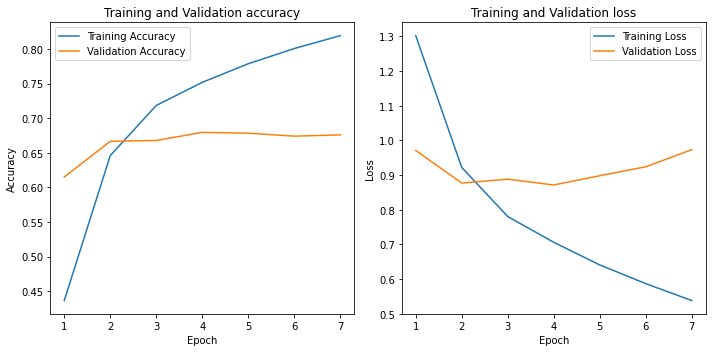

In [54]:
plotLearningCurve(r,n_epochs)

In [55]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(pad_test,ytest)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
258/258 [==============================] - 3s 10ms/step - loss: 0.9678 - accuracy: 0.6822
{'loss': 0.967810869216919, 'accuracy': 0.6822157502174377}


258/258 [==============================] - 2s 9ms/step


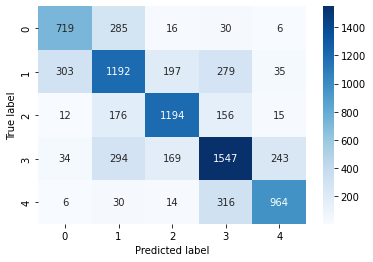

In [57]:
# Generate predictions for the test dataset
ypred_prob = model.predict(pad_test)

# Get the class with the highest probability for each sample
ypred = np.argmax(ypred_prob, axis=1)

# Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)

# Visualize the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# 2-CNN model

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

from tensorflow.keras.preprocessing import sequence
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, MaxPool1D, Dropout, SimpleRNN, LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import sequence
import numpy as np
import string
import re

In [59]:

# Apply to the dataset 
df['sentiment'] = df.Sentiment.apply(to_sentiment)
text = df.review.tolist()
label = df.sentiment.tolist()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=1)

In [61]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space

In [62]:
X_train_clean = []
X_test_clean = []
clean = re.compile(r'<[^>]+>')
for i, test in enumerate(X_train):
    tmp_text = test.lower()
    tmp_text = tmp_text.replace('\n', '')
    tmp_text = clean.sub('', tmp_text)
    tmp_text = tmp_text.translate(translator)
    X_train_clean.append(tmp_text)

for i, test in enumerate(X_test):
    tmp_text = test.lower()
    tmp_text = tmp_text.replace('\n', '')
    tmp_text = clean.sub('', tmp_text)
    tmp_text = tmp_text.translate(translator)
    X_test_clean.append(tmp_text)

X_train_clean = np.array(X_train_clean)
X_test_clean = np.array(X_test_clean)

X_train = X_train_clean
X_test = X_test_clean

In [63]:
top_words = 40000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [64]:
max_words = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_words, padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=max_words, padding='post')

In [65]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [66]:
X_train.shape


(32925, 100)

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Flatten, Dense,Reshape


In [73]:

# Define the number of classes
num_classes = 5

model = Sequential()
model.add(Embedding(40000, 32, input_length=100))
model.add(Conv1D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output probabilities for each class
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use sparse_categorical_crossentropy for multi-class classification


In [74]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 32)           1280000   
                                                                 
 conv1d_8 (Conv1D)           (None, 100, 256)          24832     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 50, 256)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 50, 256)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 50, 128)           98432     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 25, 128)          0         
 1D)                                                  

In [75]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=128, verbose=2)

Epoch 1/20
258/258 - 41s - loss: 1.2480 - accuracy: 0.4564 - val_loss: 0.8176 - val_accuracy: 0.6998 - 41s/epoch - 159ms/step
Epoch 2/20
258/258 - 39s - loss: 0.6541 - accuracy: 0.7649 - val_loss: 0.6889 - val_accuracy: 0.7555 - 39s/epoch - 151ms/step
Epoch 3/20
258/258 - 40s - loss: 0.4450 - accuracy: 0.8443 - val_loss: 0.6753 - val_accuracy: 0.7660 - 40s/epoch - 154ms/step
Epoch 4/20
258/258 - 45s - loss: 0.3250 - accuracy: 0.8888 - val_loss: 0.7257 - val_accuracy: 0.7654 - 45s/epoch - 175ms/step
Epoch 5/20
258/258 - 45s - loss: 0.2439 - accuracy: 0.9185 - val_loss: 0.7792 - val_accuracy: 0.7665 - 45s/epoch - 175ms/step
Epoch 6/20
258/258 - 45s - loss: 0.1862 - accuracy: 0.9345 - val_loss: 1.0510 - val_accuracy: 0.7351 - 45s/epoch - 176ms/step
Epoch 7/20
258/258 - 45s - loss: 0.1486 - accuracy: 0.9493 - val_loss: 0.9819 - val_accuracy: 0.7578 - 45s/epoch - 175ms/step
Epoch 8/20
258/258 - 45s - loss: 0.1144 - accuracy: 0.9611 - val_loss: 1.2881 - val_accuracy: 0.7270 - 45s/epoch - 175

In [76]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(X_test,y_test)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
258/258 [==============================] - 3s 12ms/step - loss: 1.8624 - accuracy: 0.7324
{'loss': 1.86237370967865, 'accuracy': 0.7323858141899109}


# 3- CNN-LSTM Model

In [80]:
model = Sequential()
model.add(Embedding(40000, 32, input_length=100))
model.add(Conv1D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))  # Keep sequences for subsequent LSTM layer
model.add(LSTM(32))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  # Multi-class classification with softmax
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 32)           1280000   
                                                                 
 conv1d_12 (Conv1D)          (None, 100, 256)          24832     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 50, 256)          0         
 g1D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 50, 256)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 50, 128)           98432     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 25, 128)          0         
 g1D)                                                 

In [82]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=128, verbose=2)

Epoch 1/20
258/258 - 72s - loss: 1.3818 - accuracy: 0.3909 - val_loss: 1.1812 - val_accuracy: 0.5159 - 72s/epoch - 281ms/step
Epoch 2/20
258/258 - 61s - loss: 0.9391 - accuracy: 0.6400 - val_loss: 0.8345 - val_accuracy: 0.7017 - 61s/epoch - 236ms/step
Epoch 3/20
258/258 - 64s - loss: 0.6577 - accuracy: 0.7639 - val_loss: 0.7399 - val_accuracy: 0.7438 - 64s/epoch - 246ms/step
Epoch 4/20
258/258 - 63s - loss: 0.5015 - accuracy: 0.8282 - val_loss: 0.7378 - val_accuracy: 0.7557 - 63s/epoch - 244ms/step
Epoch 5/20
258/258 - 65s - loss: 0.3895 - accuracy: 0.8742 - val_loss: 0.7620 - val_accuracy: 0.7477 - 65s/epoch - 253ms/step
Epoch 6/20
258/258 - 63s - loss: 0.3080 - accuracy: 0.9028 - val_loss: 0.7951 - val_accuracy: 0.7487 - 63s/epoch - 244ms/step
Epoch 7/20
258/258 - 65s - loss: 0.2595 - accuracy: 0.9180 - val_loss: 0.9062 - val_accuracy: 0.7372 - 65s/epoch - 254ms/step
Epoch 8/20
258/258 - 64s - loss: 0.2172 - accuracy: 0.9320 - val_loss: 0.9054 - val_accuracy: 0.7428 - 64s/epoch - 250

In [84]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(X_test,y_test)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
258/258 [==============================] - 6s 25ms/step - loss: 1.4211 - accuracy: 0.7112
{'loss': 1.4211093187332153, 'accuracy': 0.7112487554550171}


# 4- LSTM-CNN Model

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Embedding(input_dim=40000, output_dim=64, input_length=100))  # Embedding layer
model.add(LSTM(units=64, return_sequences=True))  # LSTM layer with return sequences
model.add(LSTM(units=32, return_sequences=True))  # LSTM layer with return sequences
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))  # Convolutional layer
model.add(MaxPooling1D(pool_size=2))  # MaxPooling layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Convolutional layer
model.add(MaxPooling1D(pool_size=2))  # MaxPooling layer
model.add(Flatten())  # Flatten layer
model.add(Dense(units=5, activation='softmax'))  # Output layer for multi-class classification

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [112]:
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 100, 64)           2560000   
                                                                 
 lstm_23 (LSTM)              (None, 100, 64)           33024     
                                                                 
 lstm_24 (LSTM)              (None, 100, 32)           12416     
                                                                 
 conv1d_25 (Conv1D)          (None, 98, 64)            6208      
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 49, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_26 (Conv1D)          (None, 47, 32)            6176      
                                                     

In [113]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=128, verbose=2)

Epoch 1/20
258/258 - 95s - loss: 1.2985 - accuracy: 0.4337 - val_loss: 0.9534 - val_accuracy: 0.6293 - 95s/epoch - 370ms/step
Epoch 2/20
258/258 - 78s - loss: 0.7271 - accuracy: 0.7283 - val_loss: 0.7971 - val_accuracy: 0.7051 - 78s/epoch - 302ms/step
Epoch 3/20
258/258 - 90s - loss: 0.4846 - accuracy: 0.8344 - val_loss: 0.8022 - val_accuracy: 0.7211 - 90s/epoch - 351ms/step
Epoch 4/20
258/258 - 89s - loss: 0.3511 - accuracy: 0.8853 - val_loss: 0.8291 - val_accuracy: 0.7286 - 89s/epoch - 346ms/step
Epoch 5/20
258/258 - 92s - loss: 0.2608 - accuracy: 0.9146 - val_loss: 1.0515 - val_accuracy: 0.7217 - 92s/epoch - 355ms/step
Epoch 6/20
258/258 - 93s - loss: 0.1987 - accuracy: 0.9346 - val_loss: 1.0656 - val_accuracy: 0.7297 - 93s/epoch - 359ms/step
Epoch 7/20
258/258 - 82s - loss: 0.1458 - accuracy: 0.9523 - val_loss: 1.2454 - val_accuracy: 0.7190 - 82s/epoch - 317ms/step
Epoch 8/20
258/258 - 68s - loss: 0.1111 - accuracy: 0.9642 - val_loss: 1.4188 - val_accuracy: 0.7077 - 68s/epoch - 262

In [114]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(X_test,y_test)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
258/258 [==============================] - 10s 41ms/step - loss: 2.1302 - accuracy: 0.7173
{'loss': 2.1301684379577637, 'accuracy': 0.7173226475715637}


258/258 [==============================] - 9s 33ms/step


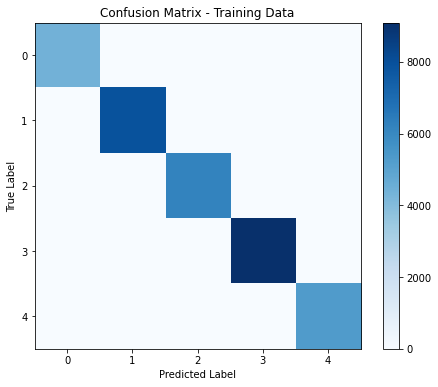

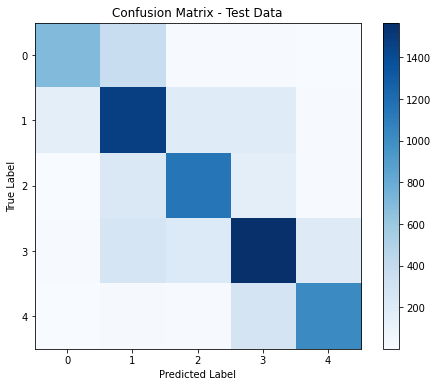

NameError: name 'history' is not defined

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained the model and have access to y_pred_train and y_pred_test

# Generate predictions for the test dataset
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Get the class with the highest probability for each sample
y_pred_train_classes = np.argmax(y_pred_train, axis=1)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Get the confusion matrix
cf_matrix_train = confusion_matrix(y_train, y_pred_train_classes)
cf_matrix_test = confusion_matrix(y_test, y_pred_test_classes)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
plt.imshow(cf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Data')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=range(5))
plt.yticks(ticks=range(5))
plt.show()

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
plt.imshow(cf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=range(5))
plt.yticks(ticks=range(5))
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Sources

- http://konukoii.com/blog/2018/02/19/twitter-sentiment-analysis-using-combined-lstm-cnn-models/
- https://arxiv.org/pdf/1408.5882.pdf
- https://github.com/pytorch/ignite/blob/master/examples/notebooks/TextCNN.ipynb
- https://www.kaggle.com/raghav2002sharma/sentiment-classifier-with-cnn-bi-lstm
- https://www.kaggle.com/ashrafkhan94/imdb-review-comparison-using-cnn-lstm-bert
- https://www.kaggle.com/parth05rohilla/bi-lstm-and-cnn-model-top-10/notebook
- https://www.kaggle.com/c/movie-review-sentiment-analysis-kernels-only/code?competitionId=10025&searchQuery=cnn
- https://colab.research.google.com/github/d2l-ai/d2l-en-colab/blob/master/chapter_natural-language-processing-applications/sentiment-analysis-cnn.ipynb
- https://www.kaggle.com/nafisur/keras-models-lstm-cnn-gru-bidirectional-glove
- https://www.kaggle.com/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert#5.-Predictive-Modelling-using-Deep-Learning
- https://www.kaggle.com/clementbrehard/imdb-conv1d-lstm